In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
<a name = Section4></a>
# **Introduction and Data Description**
---

Task 1

Amazon prime is a popular streaming service that offers a vast catalog of movies, TV shows, and original contents. The data consist of contents added to Prime from 2008 to 2021. The oldest content is as old as 1925 and the newest as 2021 (see attachment prime.csv). The tasks that you need to perform are

Undertake an exploratory data analysis and produce a 2 page report on your findings/insights

Clean the data and produce good visualisation for story telling

Submit your code and report via Github repo

---
<a name = Section3></a>
# **Installing & Importing Libraries**
---

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import plotly.graph_objs as go
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textblob import TextBlob
#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

<a name = Section4></a>
# **Data Loading**
---



In [8]:
df_train = pd.read_csv('/content/drive/MyDrive/Kovai.co/Data/prime.csv')

In [9]:
df_train.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
df_train.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...



---
<a name = Section4></a>
# **4. Data Information**
---


In [11]:
df_train.info(verbose=True, memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 8.5 MB


**Observations:**

- The dataset contains 8,807 entries and 12 columns. Notably, the "director," "cast," and "country" columns still have a substantial number of missing values, which may require careful handling during analysis. The data types remain consistent, with text data represented as objects and one numerical column ("release_year"). The dataset's memory usage remains at approximately 8.5 MB, indicating efficient data management.

<a name = Section51> </a>
# **6. Checking for Missing Data**

In [12]:
def plot_missing_value(dataframe, title):
    total_missing = dataframe.isnull().sum().sum()
    total_values = dataframe.size
    missing_percentage = (total_missing / total_values) * 100

    labels = ['Missing', 'Available']
    sizes = [missing_percentage, 100 - missing_percentage]
    colors = ['red', 'green']

    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Percentage of Missing Values - {title}')
    plt.legend(title='Data Availability', labels=labels, loc='upper right')
    plt.axis('equal')
    plt.show()

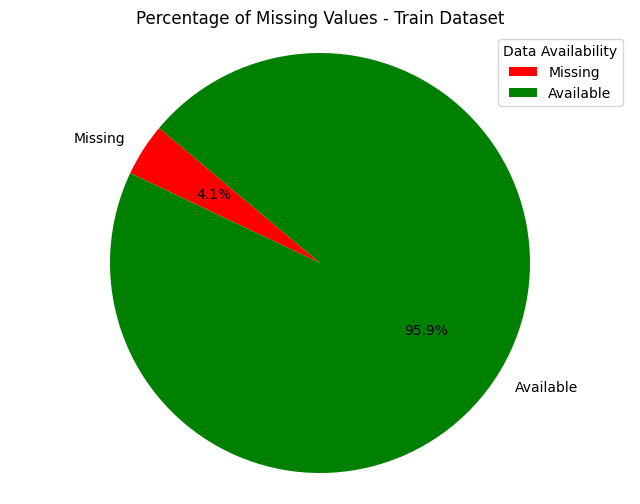

In [13]:
plot_missing_value(df_train, "Train Dataset")

In [16]:
df_train.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Observations:**

- Observation 1: The "director," "cast," and "country" columns have a high percentage of missing data, with 2634, 825, and 831 missing values, respectively, indicating the need for data imputation or considering how to handle these missing entries.

- Observation 2: "Rating" has 4 missing values, suggesting that some content may not have received a rating, which should be taken into account when conducting analysis involving content ratings.

- Observation 3: Only a small number of missing values (10) are present in the "date_added" column, which indicates that most entries have information about when they were added to the dataset.

- Observation 4: The other columns, such as "show_id," "type," "title," "release_year," "duration," "listed_in," and "description," appear to have no missing data, which is important for maintaining the completeness of these key attributes in your dataset.

- Observation 5: Approximately 41% of the data in the dataset is missing, highlighting the importance of addressing missing values and carefully considering how to handle them during the analysis to ensure the integrity of the insights derived from the dataset.


<a name = Section51> </a>
# **Basic Statistical Analysis**

In [17]:
df_train.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<a name = Section51> </a>
# **Finding duplicate rows**

In [15]:
duplicate_rows_df = df_train[df_train.duplicated()]
print("Number of duplicate rows in Training set: ", duplicate_rows_df.shape)

Number of duplicate rows in Training set:  (0, 12)


**Observations:**

- No duplicate data

<a name = Section51> </a>
# **Distribution of Show Types**

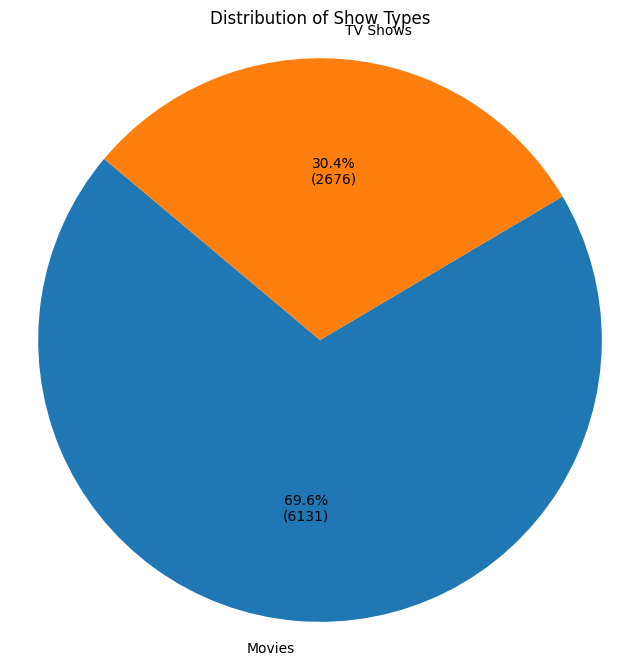

In [23]:

type_counts = df_train['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=['Movies', 'TV Shows'], autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p/100*sum(type_counts)), startangle=140, labeldistance=1.1)
plt.axis('equal')
plt.title('Distribution of Show Types')
plt.show()

- The distribution of show types (as per the "type" column) in the dataset reveals that it predominantly contains a mix of TV shows and movies, which is a key characteristic to consider when exploring the content in the dataset.
-In this dataset, movie data represents approximately 69.9% of the content, while TV shows make up about 30%, indicating that movies are the predominant content type available, which is essential information for understanding the content distribution.

<a name = Section51> </a>
# **Content Added Over Time**

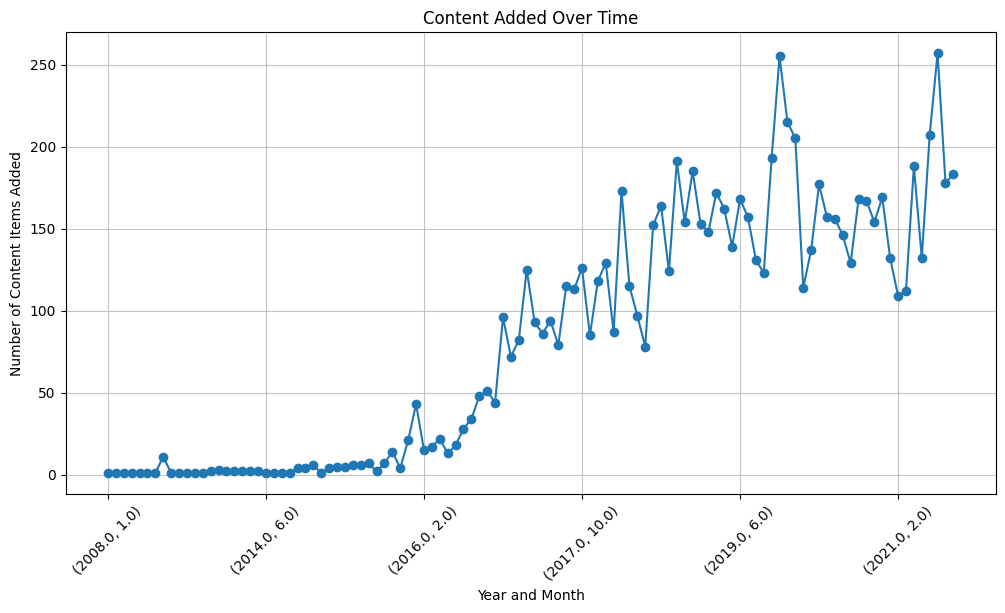

In [57]:
df_train['date_added'] = pd.to_datetime(df_train['date_added'])
df_train['year_added'] = df_train['date_added'].dt.year
df_train['month_added'] = df_train['date_added'].dt.month
content_added_over_time = df_train.groupby(['year_added', 'month_added']).size()
plt.figure(figsize=(12, 6))
content_added_over_time.plot(marker='o')
plt.title('Content Added Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Number of Content Items Added')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.75)
plt.show()

- The dataset encompasses content from the years 2008 to 2021, indicating that it covers a relatively recent timeframe for both movies and TV shows. This temporal range provides valuable context for analyzing trends and patterns in the content available.






<a name = Section51> </a>
# **Distribution of Movie Release Years**

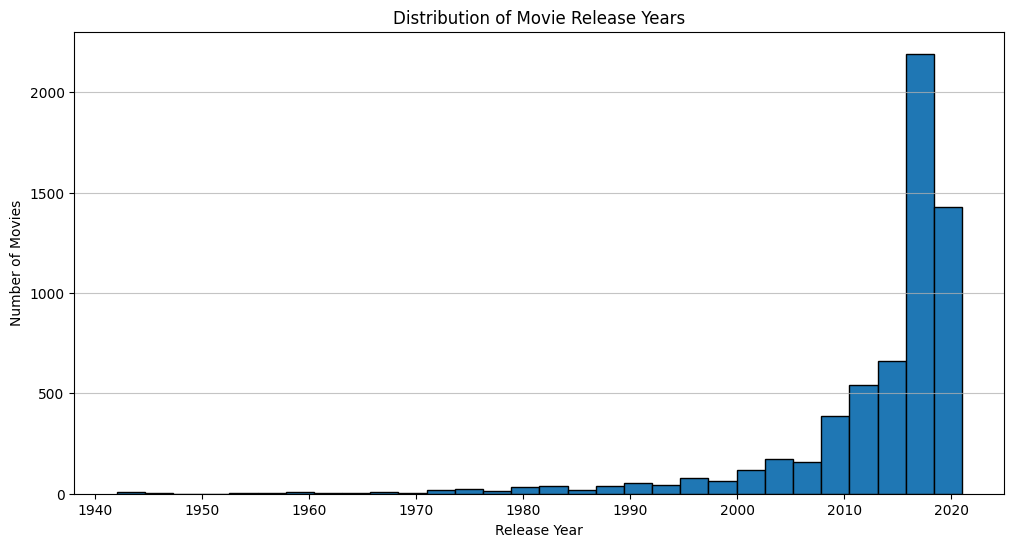

In [25]:
movies_data = df_train[df_train['type'] == 'Movie']
plt.figure(figsize=(12, 6))
plt.hist(movies_data['release_year'], bins=30, edgecolor='k')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(axis='y', alpha=0.75)
plt.show()

 - The distribution of movies in the dataset shows a notable concentration of releases during the decade from 2010 to 2020, with 2021 exhibiting a significant increase in content. This trend suggests that the majority of movies in the dataset were released during this timeframe, with 2021 standing out as a year with a particularly high volume of content.

<a name = Section51> </a>
# **Distribution of TV shows Release Years**

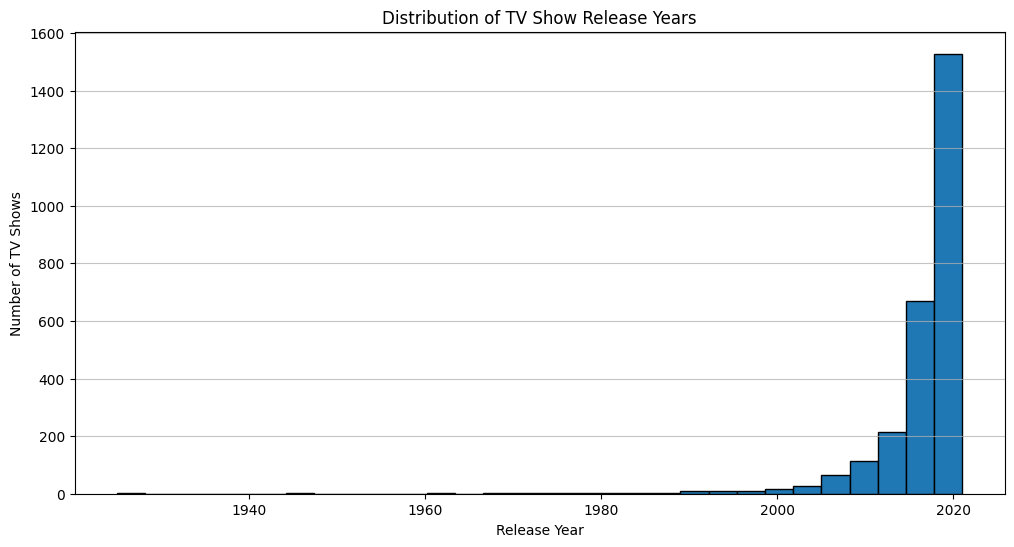

In [26]:
tv_shows_data = df_train[df_train['type'] == 'TV Show']
plt.figure(figsize=(12, 6))
plt.hist(tv_shows_data['release_year'], bins=30, edgecolor='k')
plt.title('Distribution of TV Show Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of TV Shows')
plt.grid(axis='y', alpha=0.75)
plt.show()

<a name = Section51> </a>
# **Content Additions by Month**

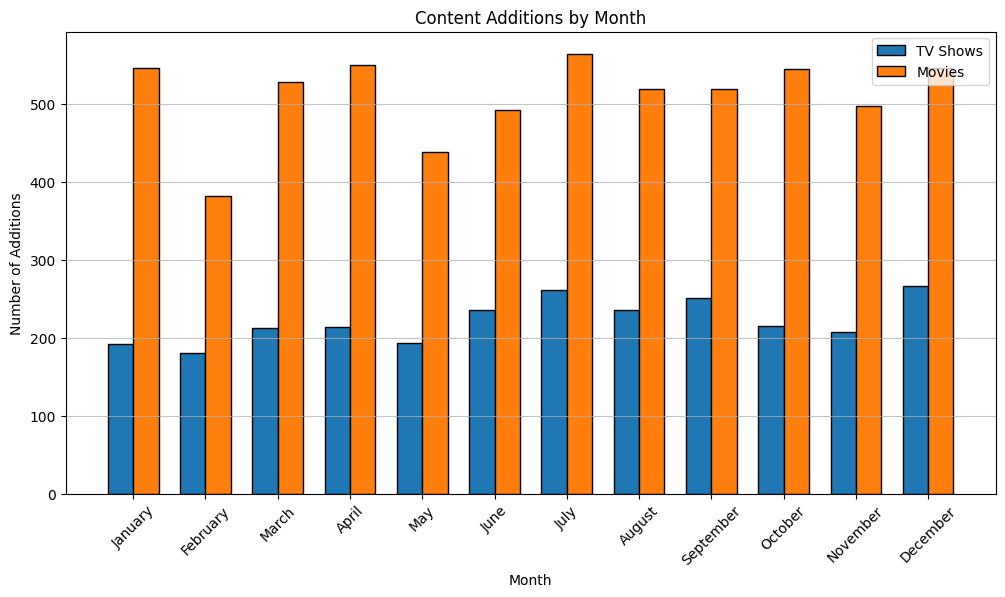

In [30]:
df_train['date_added'] = pd.to_datetime(df_train['date_added'], errors='coerce')

df_train['added_month'] = df_train['date_added'].dt.month
monthly_counts = df_train.groupby(['added_month', 'type']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
width = 0.35
months = range(1, 13)
plt.bar(months, monthly_counts['TV Show'], width, label='TV Shows', edgecolor='k')
plt.bar([month + width for month in months], monthly_counts['Movie'], width, label='Movies', edgecolor='k')
plt.title('Content Additions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Additions')
plt.xticks([month + width / 2 for month in months], [calendar.month_name[i] for i in range(1, 13)], rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

- The data reveals a consistent pattern in content additions by month, with a recurring and structured trend. This pattern may indicate that the dataset has a specific schedule or strategy for adding new content each month, which can be valuable for understanding the platform's content management approach.

<a name = Section51> </a>
# **Top 10 Oldest and Newest Movies and TV Shows**

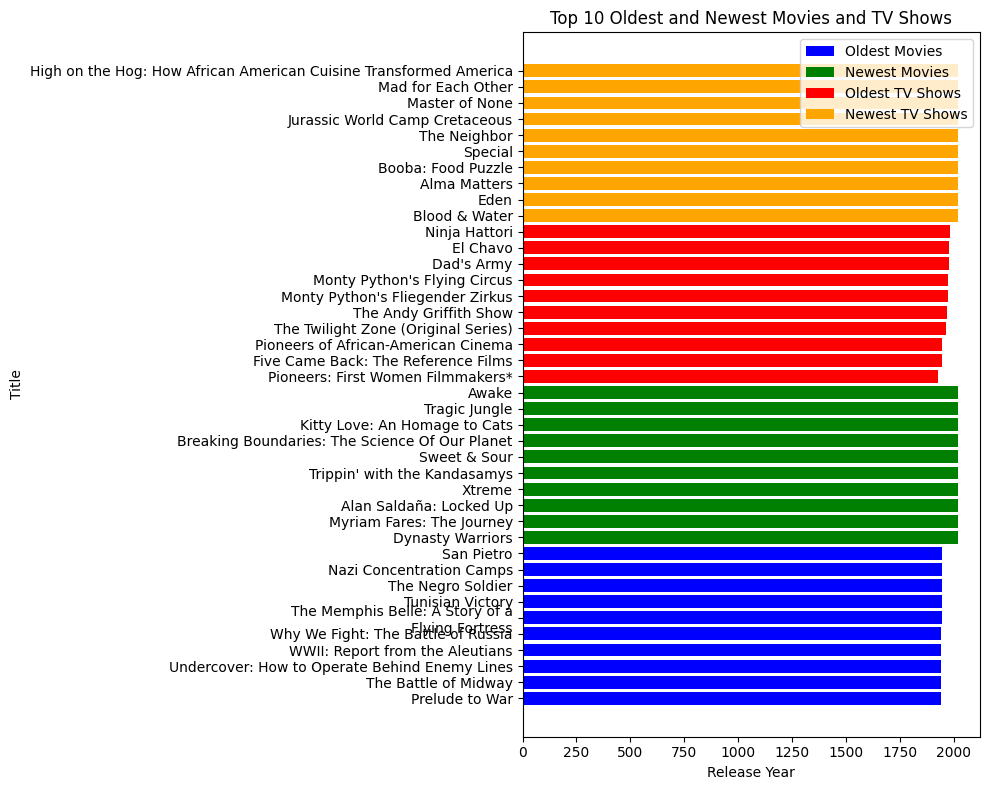

In [34]:
movies = df_train[df_train['type'] == 'Movie']
tv_shows = df_train[df_train['type'] == 'TV Show']

oldest_movies = movies.sort_values(by='release_year').head(10)
newest_movies = movies.sort_values(by='release_year', ascending=False).head(10)

oldest_tv_shows = tv_shows.sort_values(by='release_year').head(10)
newest_tv_shows = tv_shows.sort_values(by='release_year', ascending=False).head(10)

plt.figure(figsize=(10, 8))

plt.barh(oldest_movies['title'], oldest_movies['release_year'], color='blue', label='Oldest Movies')
plt.barh(newest_movies['title'], newest_movies['release_year'], color='green', label='Newest Movies')
plt.barh(oldest_tv_shows['title'], oldest_tv_shows['release_year'], color='red', label='Oldest TV Shows')
plt.barh(newest_tv_shows['title'], newest_tv_shows['release_year'], color='orange', label='Newest TV Shows')

plt.title('Top 10 Oldest and Newest Movies and TV Shows')
plt.xlabel('Release Year')
plt.ylabel('Title')
plt.legend()
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [35]:
movies = df_train[df_train['type'] == 'Movie']
tv_shows = df_train[df_train['type'] == 'TV Show']
oldest_movies = movies.sort_values(by='release_year').head(10)
newest_movies = movies.sort_values(by='release_year', ascending=False).head(10)
oldest_tv_shows = tv_shows.sort_values(by='release_year').head(10)
newest_tv_shows = tv_shows.sort_values(by='release_year', ascending=False).head(10)
data = pd.concat([oldest_movies, newest_movies, oldest_tv_shows, newest_tv_shows])

new_old_content = data[['type', 'title', 'release_year', 'date_added']]

In [36]:
new_old_content

,type,title,release_year,date_added
7790,Movie,Prelude to War,1942,2017-03-31
8205,Movie,The Battle of Midway,1942,2017-03-31
8660,Movie,Undercover: How to Operate Behind Enemy Lines,1943,2017-03-31
8763,Movie,WWII: Report from the Aleutians,1943,2017-03-31
8739,Movie,Why We Fight: The Battle of Russia,1943,2017-03-31
8419,Movie,The Memphis Belle: A Story of a\nFlying Fortress,1944,2017-03-31
8640,Movie,Tunisian Victory,1944,2017-03-31
8436,Movie,The Negro Soldier,1944,2017-03-31
7575,Movie,Nazi Concentration Camps,1945,2017-03-31
7930,Movie,San Pietro,1945,2017-03-31


- The dataset provides information on the top 10 oldest and newest movies and TV shows. The oldest entries, dating back to the early 1940s and even 1925, showcase classic content. On the other hand, the newest entries, all from 2021, reflect the most recent additions, highlighting a wide range of content from different eras for viewers to explore.

<a name = Section51> </a>
# **Top Countries with the Most Content Added**

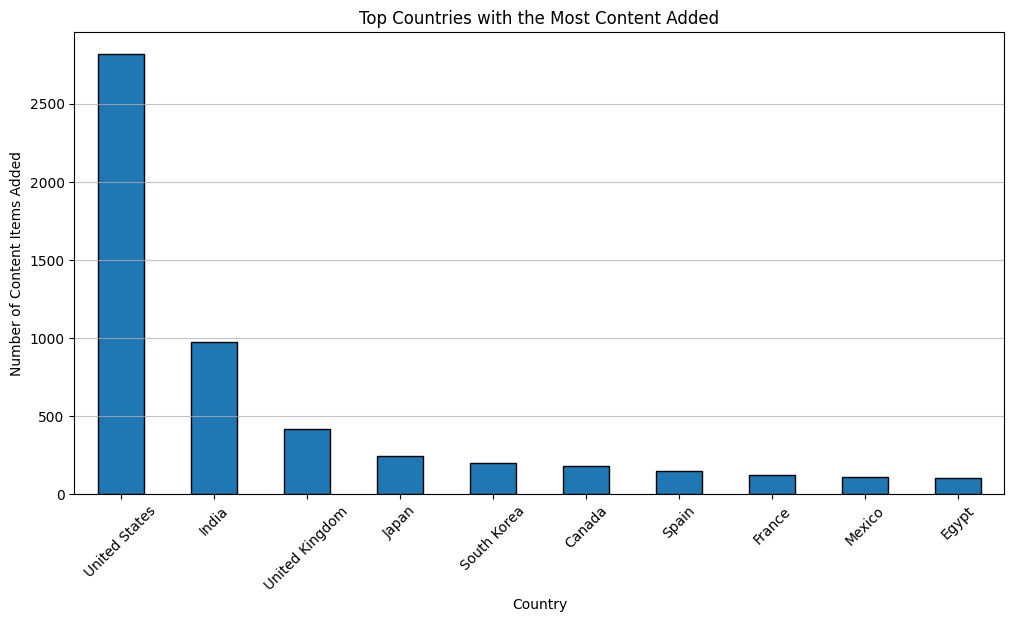

In [37]:
country_counts = df_train['country'].value_counts()
top_countries = country_counts.head(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', edgecolor='k')
plt.title('Top Countries with the Most Content Added')
plt.xlabel('Country')
plt.ylabel('Number of Content Items Added')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


- The top three countries with the most content added to the dataset are the USA, India, and the UK. These countries have a significant presence in the platform's content library, suggesting a diverse range of content from these regions.

<a name = Section51> </a>
# **Distribution of Content Ratings**

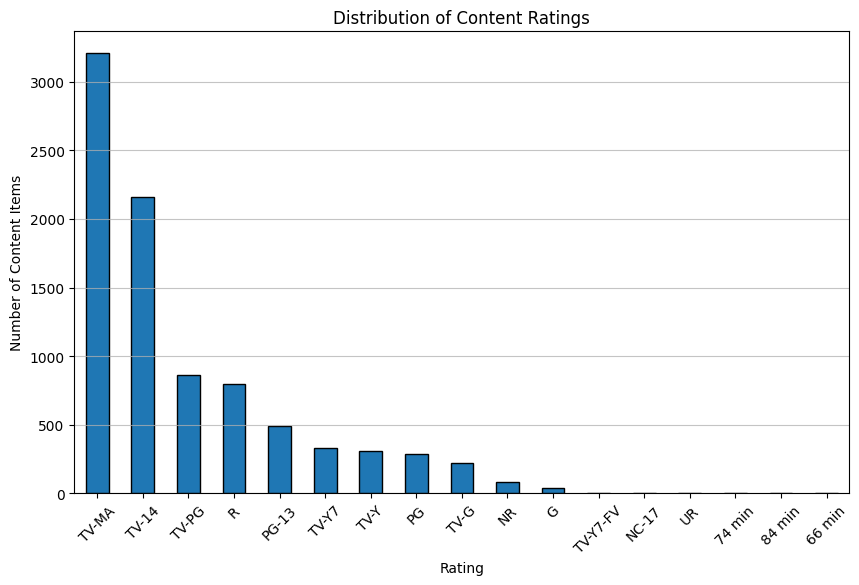

In [41]:

rating_counts = df_train['rating'].value_counts()
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', edgecolor='k')
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Content Items')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

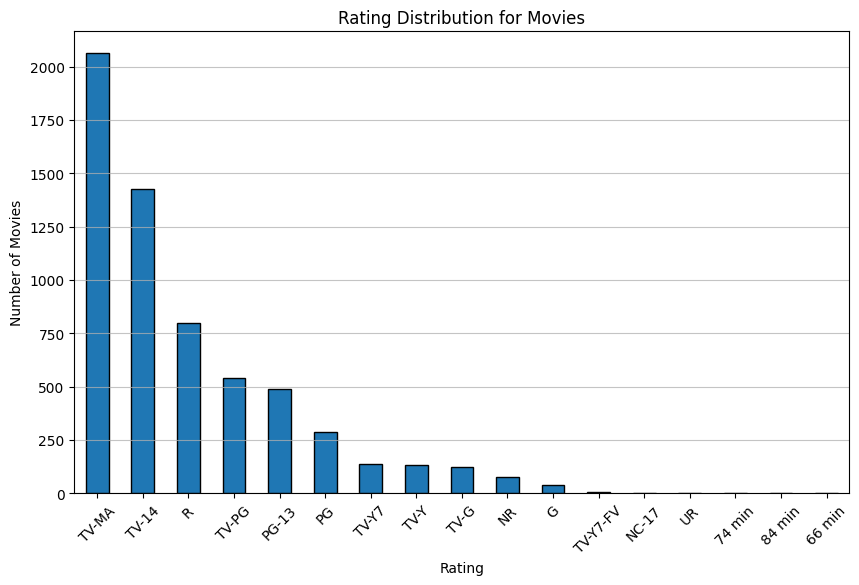

In [44]:

movies = df_train[df_train['type'] == 'Movie']
rating_counts_movies = movies['rating'].value_counts()
plt.figure(figsize=(10, 6))
rating_counts_movies.plot(kind='bar', edgecolor='k')
plt.title('Rating Distribution for Movies')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

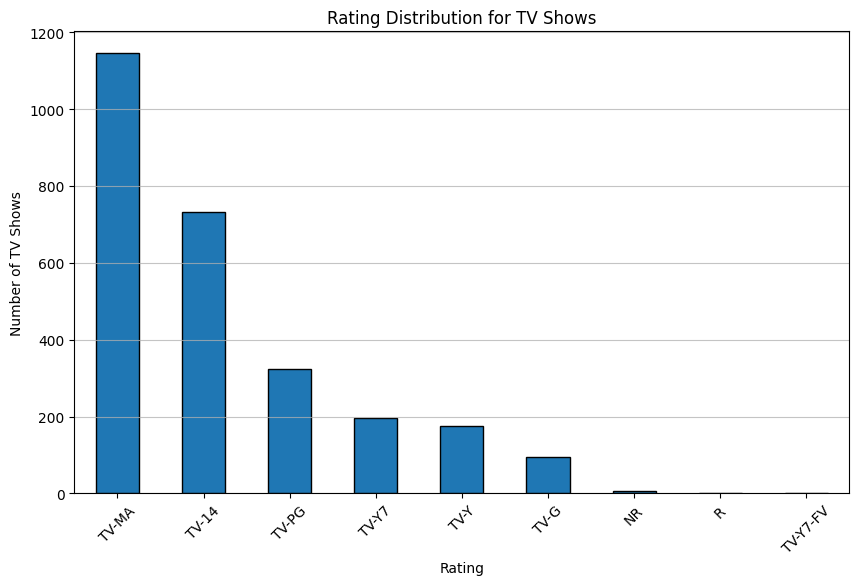

In [43]:
tv_shows = df_train[df_train['type'] == 'TV Show']
rating_counts_tv_shows = tv_shows['rating'].value_counts()
plt.figure(figsize=(10, 6))
rating_counts_tv_shows.plot(kind='bar', edgecolor='k')
plt.title('Rating Distribution for TV Shows')
plt.xlabel('Rating')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


-  If we look at the ratings for movies and TV shows in the dataset, the ones with "TV-MA," "TV-14," and "TV-PG" are the most common. So, if you see these ratings, it tells you what kind of content to expect – whether it's suitable for adults, teenagers, or a general audience.

<a name = Section51> </a>
# **Distribution of Content Durations**

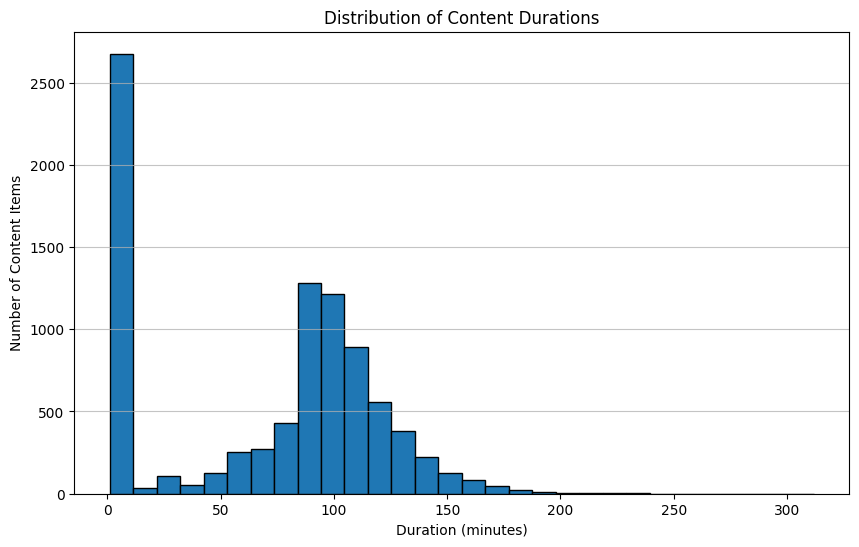

In [45]:
df_train['duration'] = df_train['duration'].str.extract('(\d+)').astype(float)
plt.figure(figsize=(10, 6))
plt.hist(df_train['duration'], bins=30, edgecolor='k')
plt.title('Distribution of Content Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Content Items')
plt.grid(axis='y', alpha=0.75)
plt.show()

- Looking at the durations of movies and TV shows, many of them are between 0 to 10 hours, indicating that a significant portion of the content is relatively short and doesn't require a long time commitment.

<a name = Section51> </a>
# **Top Cast Members by Number of Content Items|**

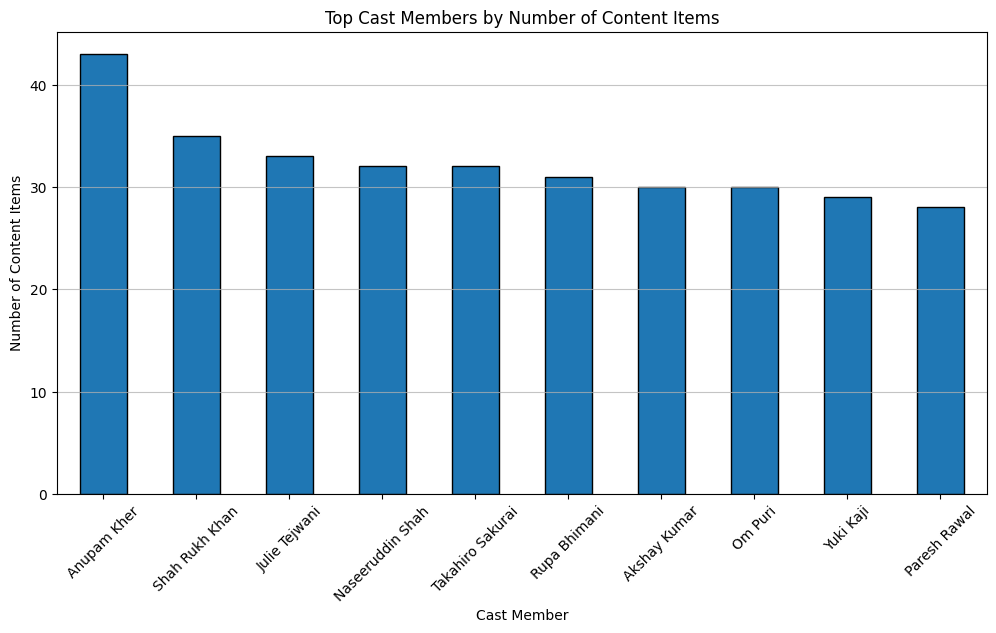

In [46]:
df_train['cast'] = df_train['cast'].str.split(', ')
cast_df = df_train.explode('cast')
top_cast = cast_df['cast'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_cast.plot(kind='bar', edgecolor='k')
plt.title('Top Cast Members by Number of Content Items')
plt.xlabel('Cast Member')
plt.ylabel('Number of Content Items')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

-  The dataset allows us to identify the top cast members who appear in the most content items. This information can help us understand which actors or actresses have been prominently featured in a significant number of movies and TV shows.

<a name = Section51> </a>
# **Top Directors of Movies by Number of Content Items**

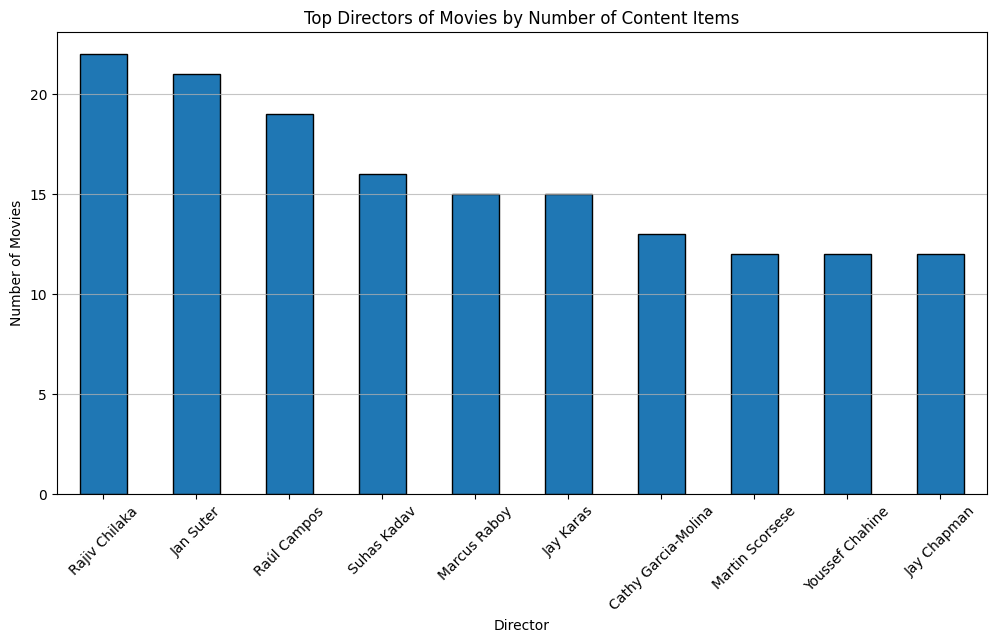

In [47]:
movies = df_train[df_train['type'] == 'Movie']
movies['director'] = movies['director'].str.split(', ')

directors_df_movies = movies.explode('director')
top_directors_movies = directors_df_movies['director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_directors_movies.plot(kind='bar', edgecolor='k')
plt.title('Top Directors of Movies by Number of Content Items')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

- We can use the dataset to determine the top directors of movies based on the number of content items they've directed. This information provides insights into which directors have been involved in a significant number of movies in the dataset.

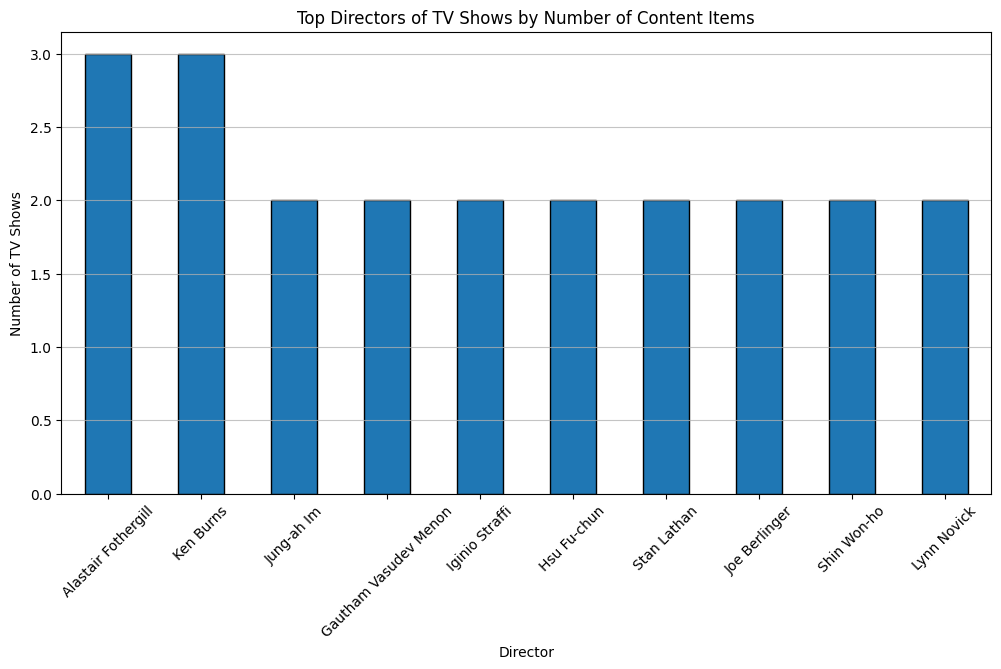

In [48]:

tv_shows = df_train[df_train['type'] == 'TV Show']
tv_shows['director'] = tv_shows['director'].str.split(', ')

directors_df_tv_shows = tv_shows.explode('director')
top_directors_tv_shows = directors_df_tv_shows['director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_directors_tv_shows.plot(kind='bar', edgecolor='k')
plt.title('Top Directors of TV Shows by Number of Content Items')
plt.xlabel('Director')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


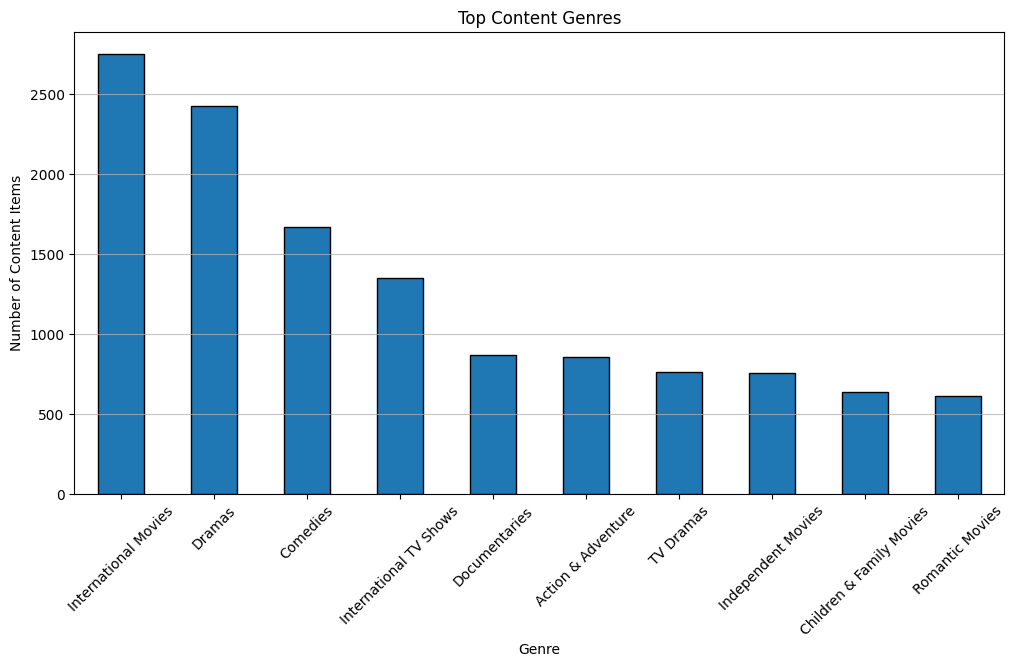

In [51]:

df_train['listed_in'] = df_train['listed_in'].str.split(', ')
genre_df = df_train.explode('listed_in')
genre_counts = genre_df['listed_in'].value_counts()
top_genres = genre_counts.head(10)
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar', edgecolor='k')
plt.title('Top Content Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Content Items')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


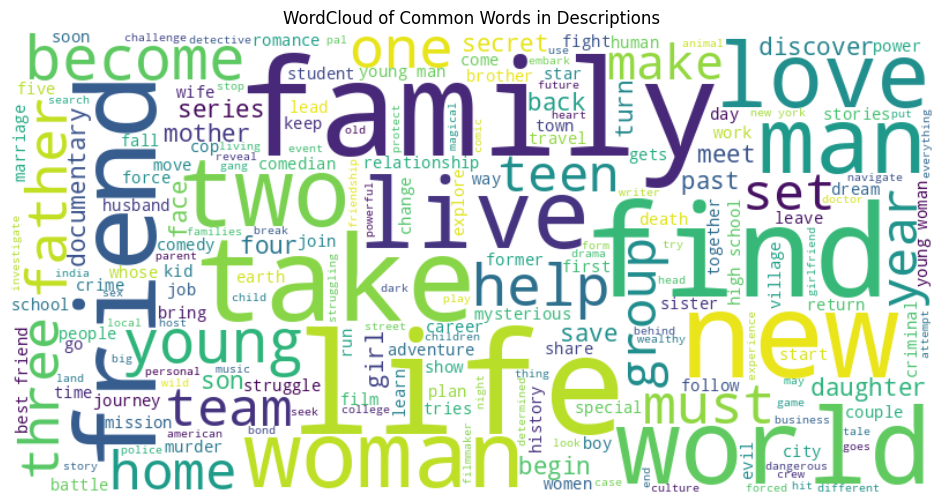

Sentiment Analysis - Polarity: 0.06716376252777427, Subjectivity: 0.49131426229499536


In [54]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
all_descriptions = ' '.join(df_train['description'])
words = nltk.word_tokenize(all_descriptions)
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud of Common Words in Descriptions')
plt.show()
blob = TextBlob(all_descriptions)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity
print(f'Sentiment Analysis - Polarity: {polarity}, Subjectivity: {subjectivity}')


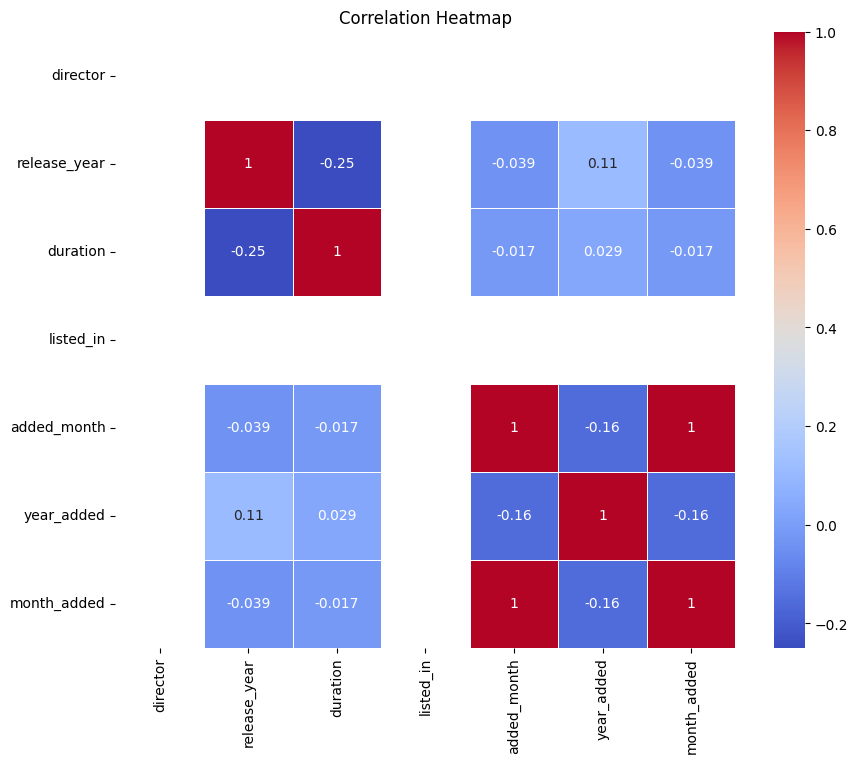

In [62]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

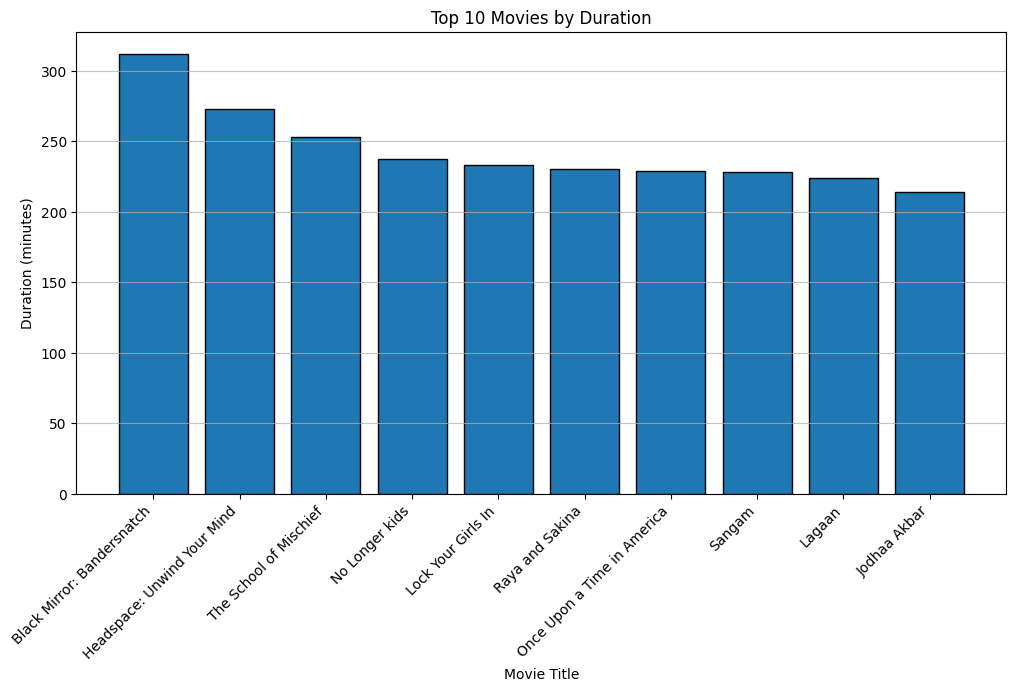

In [70]:
movies = df_train[df_train['type'] == 'Movie']
movies['duration'] = movies['duration'].astype(str)
movies['duration'] = movies['duration'].str.replace(' min', '').astype(float)
top_10_movies = movies.nlargest(10, 'duration')
plt.figure(figsize=(12, 6))
plt.bar(top_10_movies['title'], top_10_movies['duration'], edgecolor='k')
plt.title('Top 10 Movies by Duration')
plt.xlabel('Movie Title')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.show()

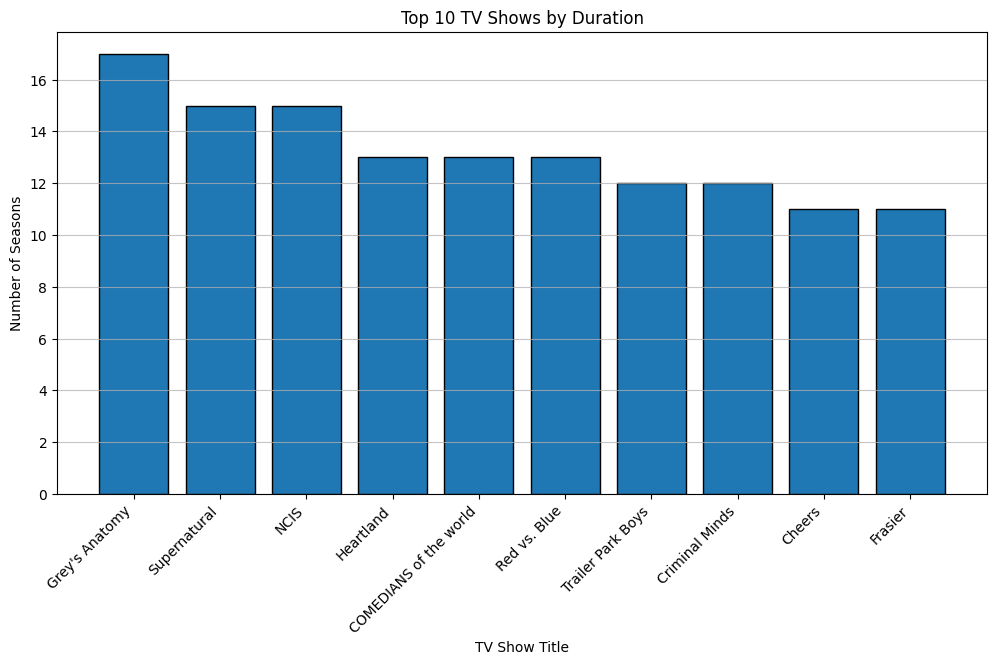

In [71]:

tv_shows = df_train[df_train['type'] == 'TV Show']
tv_shows['duration'] = tv_shows['duration'].astype(str)
tv_shows['duration'] = tv_shows['duration'].str.extract('(\d+)').astype(int)
top_10_tv_shows = tv_shows.nlargest(10, 'duration')
plt.figure(figsize=(12, 6))
plt.bar(top_10_tv_shows['title'], top_10_tv_shows['duration'], edgecolor='k')
plt.title('Top 10 TV Shows by Duration')
plt.xlabel('TV Show Title')
plt.ylabel('Number of Seasons')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.show()
